In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

# from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [70]:
from sklearn.model_selection import train_test_split

In [24]:
import pandas as pd
import numpy as np

In [25]:
df1 = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")
df2 = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data_2.csv")



In [38]:
def clean_my_columns(df):
    df.columns = df.columns.str.replace(" ", "_").str.lower().str.strip()
    return df


In [26]:
df = pd.concat([df1,df2], axis=0)

In [39]:
clean_my_columns(df)
df.columns

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour'],
      dtype='object')

In [27]:
df1.shape

(1472952, 16)

In [28]:
df2.shape

(23634, 16)

In [29]:
df.shape

(1496586, 16)

In [30]:
df['Is Fraudulent'].value_counts()

Is Fraudulent
0    1421526
1      75060
Name: count, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496586 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transaction_id      1496586 non-null  object        
 1   customer_id         1496586 non-null  object        
 2   transaction_amount  1496586 non-null  float64       
 3   transaction_date    1496586 non-null  datetime64[ns]
 4   payment_method      1496586 non-null  object        
 5   product_category    1496586 non-null  object        
 6   quantity            1496586 non-null  int64         
 7   customer_age        1496586 non-null  int64         
 8   customer_location   1496586 non-null  object        
 9   device_used         1496586 non-null  object        
 10  ip_address          1496586 non-null  object        
 11  shipping_address    1496586 non-null  object        
 12  billing_address     1496586 non-null  object        
 13  is_fraudulent      

In [36]:
df['product_category'].value_counts()

product_category
electronics        300042
health & beauty    300038
clothing           299018
toys & games       298996
home & garden      298492
Name: count, dtype: int64

In [ ]:
# make transaction to date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])



In [43]:
#Extract day of the week from date:

df['day_of_week'] = df['transaction_date'].dt.dayofweek

In [57]:
# extract month

df['month'] = df['transaction_date'].dt.month


In [58]:
# check for duplicates

df.duplicated().sum()


0

In [59]:
df.describe()

,transaction_amount,transaction_date,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour,day_of_week,month
count,1.496586e+06,1496586,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06
mean,2.268093e+02,2024-02-16 16:51:02.520362240,3.000235e+00,3.451284e+01,5.015415e-02,1.796308e+02,1.128663e+01,2.946627e+00,2.051424e+00
min,1.000000e+01,2024-01-01 00:00:00,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.862000e+01,2024-01-24 08:13:24.500000,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00,1.000000e+00,1.000000e+00
50%,1.517600e+02,2024-02-16 17:07:44,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01,3.000000e+00,2.000000e+00
75%,2.960500e+02,2024-03-11 00:44:25.249999872,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01,5.000000e+00,3.000000e+00
max,1.270175e+04,2024-04-07 08:54:03,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01,6.000000e+00,4.000000e+00
std,2.705831e+02,NaN,1.414814e+00,1.000323e+01,2.182630e-01,1.068726e+02,6.976067e+00,2.009261e+00,8.739732e-01


In [61]:
df_num = df.select_dtypes(include='number')



In [ ]:
# Outliers (boxplot and histogram)

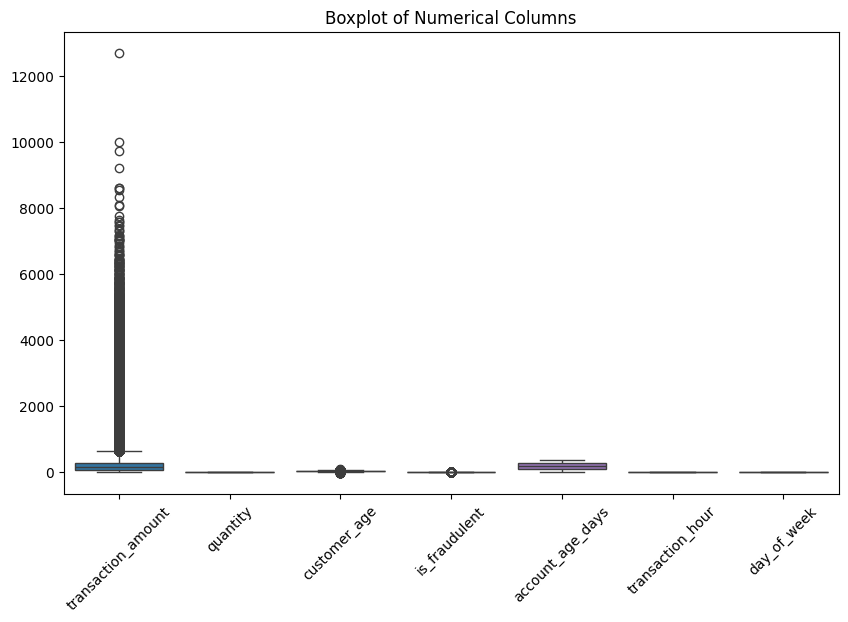

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()



<Figure size 2000x2000 with 0 Axes>

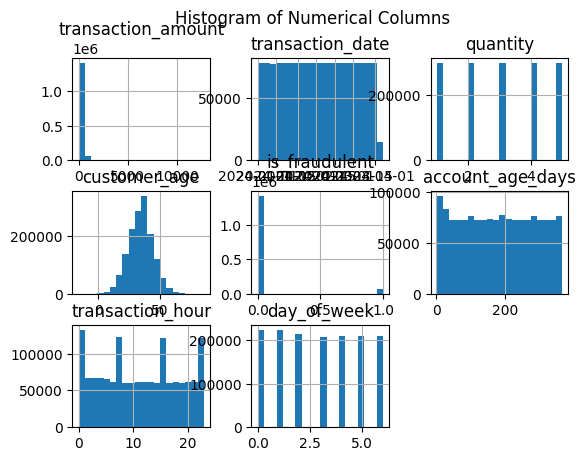

In [48]:
plt.figure(figsize=(20, 20))
df.hist(bins=20)
plt.suptitle('Histogram of Numerical Columns')
plt.show()

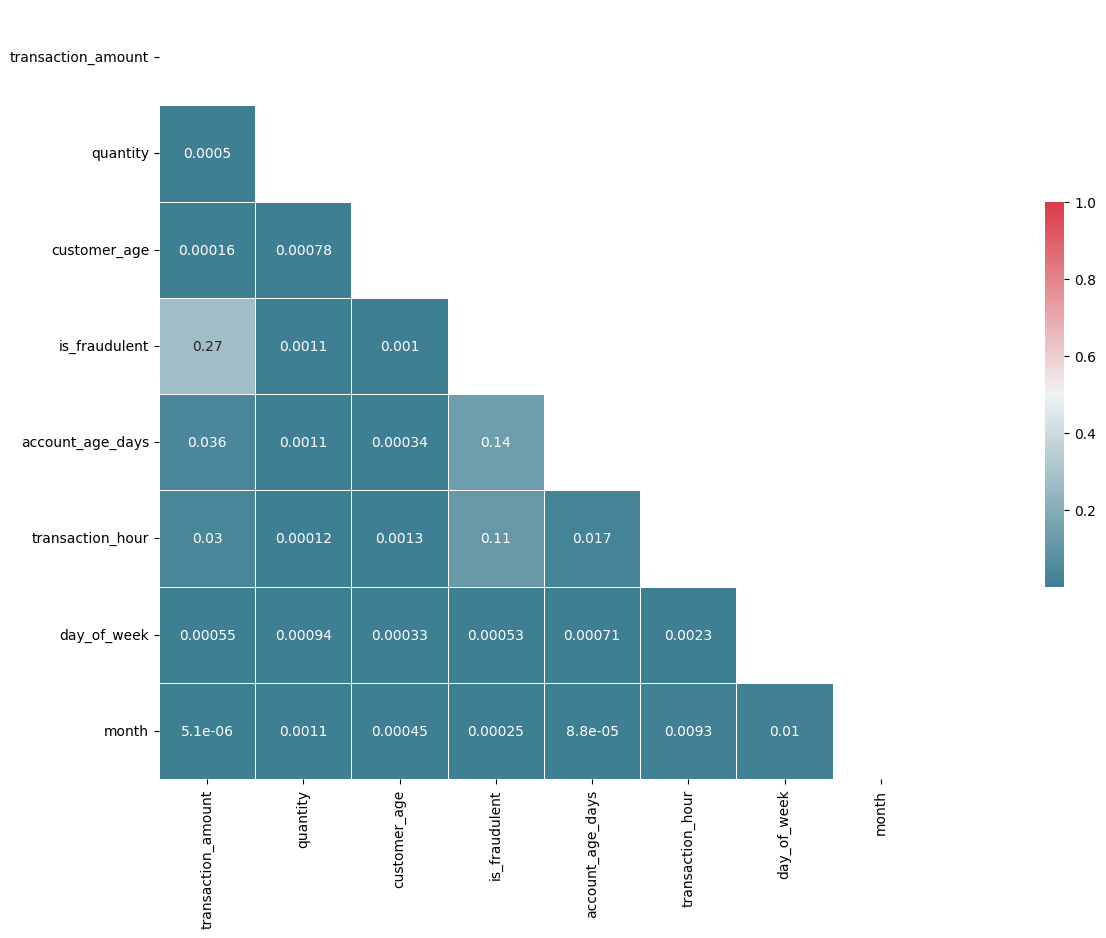

In [62]:
corr = np.abs(df_num.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
# df_tr = df_conv[df_conv['variation'] == 'Test']
# df_ctrl = df_conv[df_conv['variation'] == 'Control']


# df_tr_sample = df_tr.sample(n=20000, random_state=0)
# df_ctrl_sample = df_ctrl.sample(n=20000, random_state=0)

In [50]:
df_fraud = df[df['is_fraudulent'] == 1]
df_non_fraud = df[df['is_fraudulent'] == 0]

In [51]:
fraud_sample = df_fraud.sample(n=75000, random_state=0)

non_fraud_sample = df_non_fraud.sample(n=75000, random_state=0)


In [52]:
fraud_sample.shape

(75000, 17)

In [53]:
non_fraud_sample.shape

(75000, 17)

In [54]:
df_random_sample = pd.concat([fraud_sample,non_fraud_sample], axis=0)
df_random_sample.shape

(150000, 17)

In [55]:
df_num2 = df_random_sample.select_dtypes(include='number')


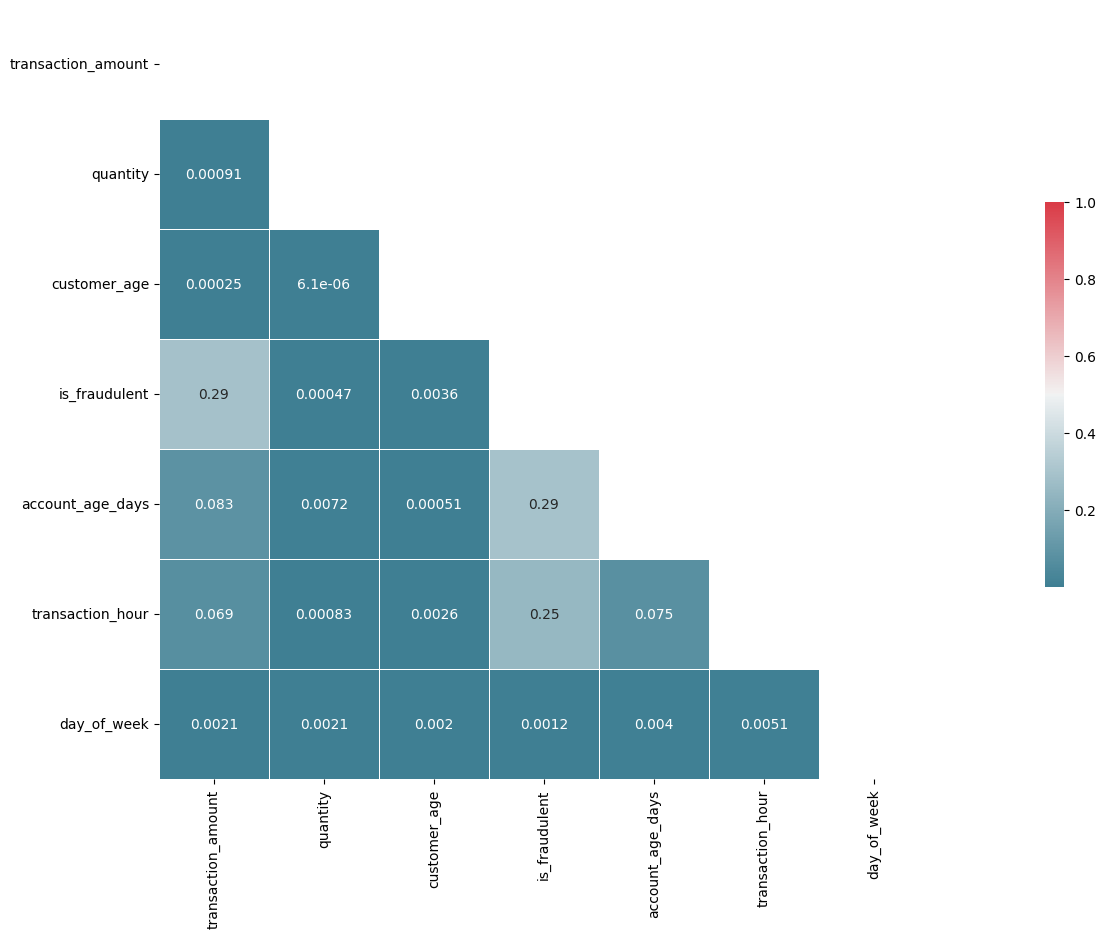

In [56]:
corr = np.abs(df_num2.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Feauture engineering

### Numerical:
- transaction amount
- age (drop?)
- transaction hour
- account_age_days
- quantity (drop?)

### Categorical (to be changed to numerical)
-  payment_method', -> one-hot encoding
- 'product_category'-> one-hot encoding
- 'device_used' -> one-hot encoding 


### To add/create:
- fraud day (of the week) - done!
      
       



In [65]:
dummies = pd.get_dummies(df_random_sample[['payment_method', 'product_category', 'device_used']], drop_first=True)
dummies.shape

(150000, 9)

In [68]:
df_random_sample=pd.concat([df_random_sample, dummies], axis=1)
df_random_sample.head()

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,...,device_used_tablet,payment_method_bank transfer,payment_method_credit card,payment_method_debit card,product_category_electronics,product_category_health & beauty,product_category_home & garden,product_category_toys & games,device_used_mobile,device_used_tablet
484526,21c8d203-00d3-48db-8bcf-5e930dfebdb2,99b10fed-d4d1-49fc-bfab-ac5ac13dc6a9,414.27,2024-03-05 23:44:14,credit card,clothing,5,26,Port Craig,tablet,...,True,False,True,False,False,False,False,False,False,True
299440,2a2208bb-ffe9-4914-b008-a98a7137c7b7,aa866fbb-2a92-4b62-8686-70b72aa0b1e9,11.16,2024-03-06 23:10:09,bank transfer,home & garden,4,29,West Zachary,tablet,...,True,True,False,False,False,False,True,False,False,True
704394,9636de0e-bb83-4afb-8bbf-76f2a8150c95,13204f36-499a-4638-a9c3-3a945a0ee61b,2040.55,2024-01-24 10:01:37,PayPal,home & garden,2,35,Amyfurt,desktop,...,False,False,False,False,False,False,True,False,False,False
207434,a01efa7c-2c55-411f-93c3-b182df9ace3e,19ec246a-35c6-40c5-9f73-13cff0c3f51b,117.55,2024-02-08 20:10:10,bank transfer,electronics,1,48,New Michaelfurt,desktop,...,False,True,False,False,True,False,False,False,False,False
1360538,f39b4cd2-1021-4979-a7c5-6d15e71c1ced,c1774a2c-d55c-4d4f-b1b2-ca10f4933b83,462.94,2024-01-26 01:12:36,credit card,home & garden,2,21,South Edward,tablet,...,True,False,True,False,False,False,True,False,False,True


In [76]:
features = df_random_sample.drop(columns= ["transaction_id", "customer_id", "transaction_date", "payment_method", "product_category","customer_location", 'device_used', 'ip_address','shipping_address','billing_address','is_fraudulent' ])
target=df_random_sample["is_fraudulent"]

In [77]:
df_random_sample.columns

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour', 'day_of_week',
       'payment_method_bank transfer', 'payment_method_credit card',
       'payment_method_debit card', 'product_category_electronics',
       'product_category_health & beauty', 'product_category_home & garden',
       'product_category_toys & games', 'device_used_mobile',
       'device_used_tablet', 'payment_method_bank transfer',
       'payment_method_credit card', 'payment_method_debit card',
       'product_category_electronics', 'product_category_health & beauty',
       'product_category_home & garden', 'product_category_toys & games',
       'device_used_mobile', 'device_used_tablet',
       'payment_method_bank transfer', 'payment_method_credi

In [78]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [79]:
from sklearn.neighbors import KNeighborsClassifier


In [98]:
knn = KNeighborsClassifier(n_neighbors=80)

In [99]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [100]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [101]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [102]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=80)

In [104]:
pred = knn.predict(X_test_norm)

<Axes: >

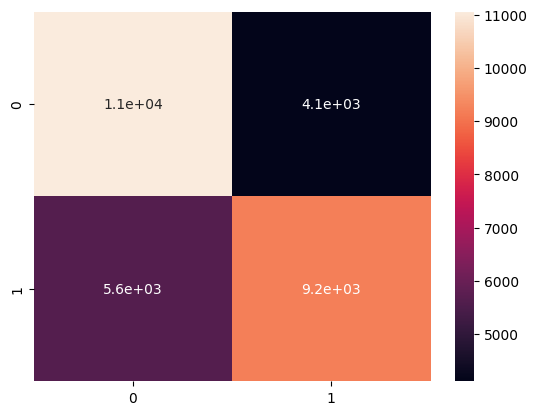

In [105]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [106]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pred), recall_score(y_test, pred)

(0.6906766917293233, 0.6193783291753759)

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69     15169
           1       0.69      0.62      0.65     14831

    accuracy                           0.67     30000
   macro avg       0.68      0.67      0.67     30000
weighted avg       0.68      0.67      0.67     30000



In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [110]:
accuracy = accuracy_score(y_test, pred)
print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 0.67


In [103]:
knn.score(X_test_norm, y_test)

0.6747